In [4]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.2 MB/s eta 0:00:00


In [34]:
import pennylane as qml
import pennylane.numpy as np


dev = qml.device('default.qubit', wires=2)
@qml.qnode(dev)

def teleport(state):

    qml.StatePrep(state, wires=0) # initial state

    qml.Hadamard(wires=1) # entangling
    qml.CZ(wires=[0, 1])

    qml.Hadamard(wires=0) # measurement in the X basis
    mes = qml.measure(wires=[0])

    qml.cond(mes == 1, qml.PauliX)(wires=1) # conditioned  X-gate
    qml.Hadamard(wires=1)

    return qml.density_matrix(wires=[1])

# random initial state
psi_init = np.random.random(2) + 1j * np.random.random(2)
psi_init = psi_init/np.linalg.norm(psi_init)
rho_init = np.outer(psi_init, np.conj(psi_init)) # density matrix


rho_teleported = teleport(psi_init)

np.allclose(rho_teleported, rho_init)

True

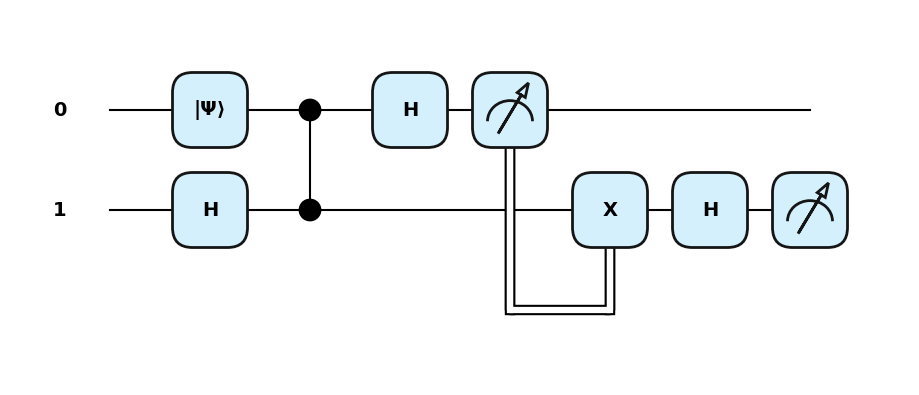

In [35]:
qml.drawer.use_style('pennylane')

fig, ax = qml.draw_mpl(teleport)(psi_init)